### Foi escolhida a (ObesityDataSet_raw_and_data_sinthetic), vamos conhecer e descrever os dados
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [287]:
import pandas as pd
import seaborn as sns
from sklearn import decomposition
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import ParameterGrid

dados = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Analisando numero de Amostras, Atributos e Classes

In [288]:
print('Numero de amostras: ', dados['NObeyesdad'].count())

num_atributos = len(dados.columns)
print('\nNumero de atributos: ', num_atributos, '\nsão eles:', dados.columns)

num_classes = len(dados['NObeyesdad'].unique())
print('\nNumero de classes: ', num_classes, '\nsão elas:', dados['NObeyesdad'].unique(), "\n")


print(dados.info())


Numero de amostras:  2111

Numero de atributos:  17 
são eles: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Numero de classes:  7 
são elas: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC   

#### Analisando balanceamento de classes dos dados

In [289]:
dados['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

observamos que o numero de classes sao razoavelmente parecidas, entao é relativamente balanceada

#### Verificando se há valores Nulos

In [290]:
dados.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### Verificando se há valores Duplicados

In [291]:
dados[dados.duplicated() == True]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


#### Gerando boxplot para os atributos dos Dados

<Axes: >

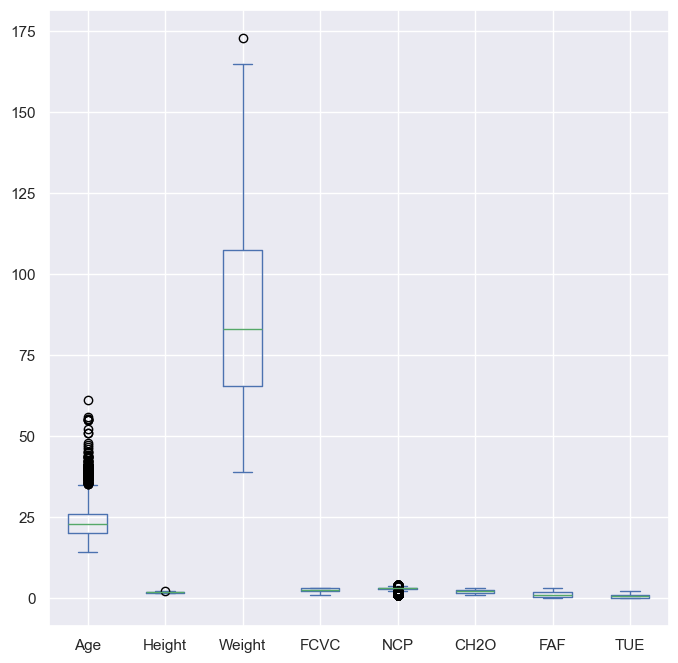

In [292]:
dados.plot(kind='box')

<Axes: >

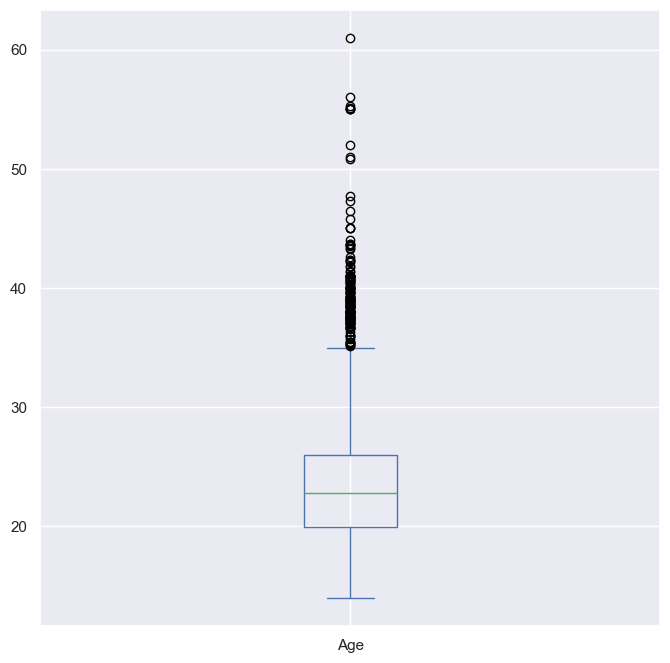

In [293]:
dados["Age"].plot(kind='box')

<Axes: >

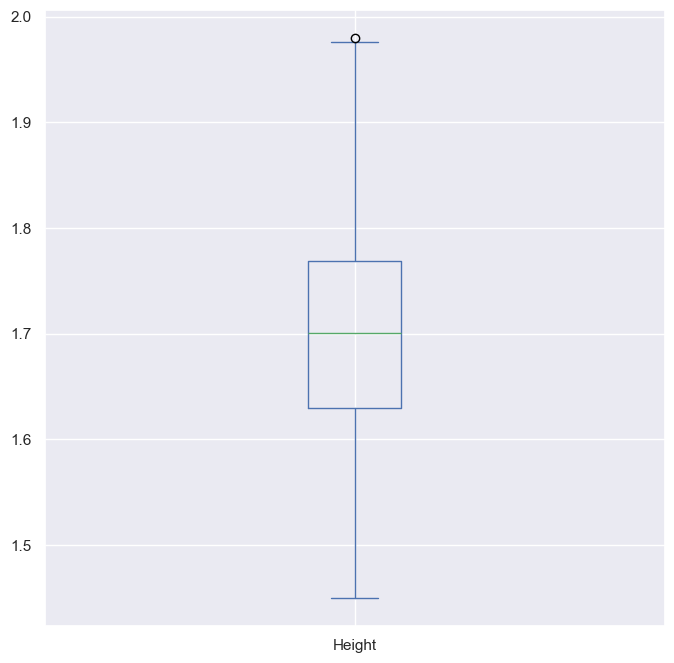

In [294]:
dados["Height"].plot(kind='box')

<Axes: >

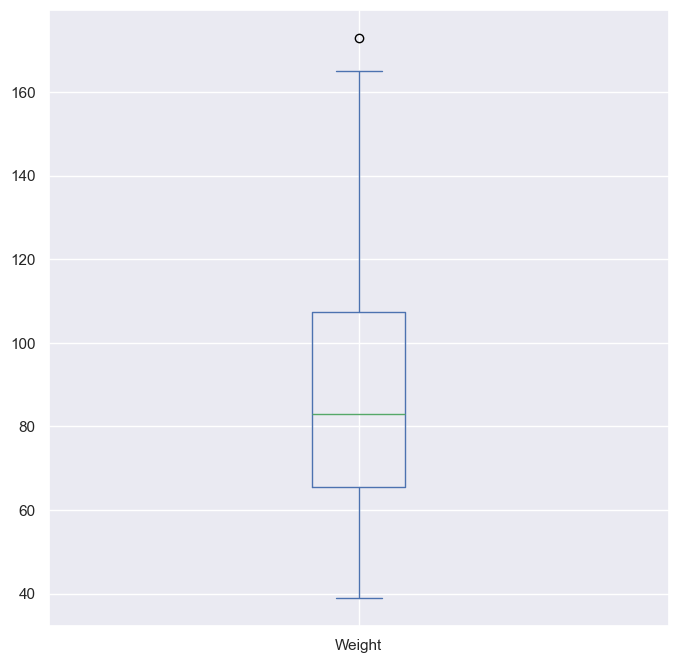

In [295]:
dados["Weight"].plot(kind='box')

<Axes: >

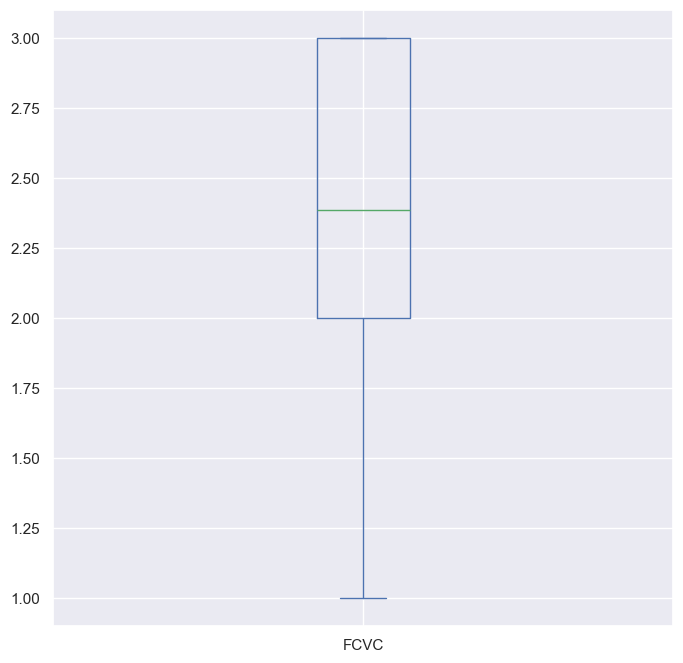

In [296]:
dados["FCVC"].plot(kind='box')

<Axes: >

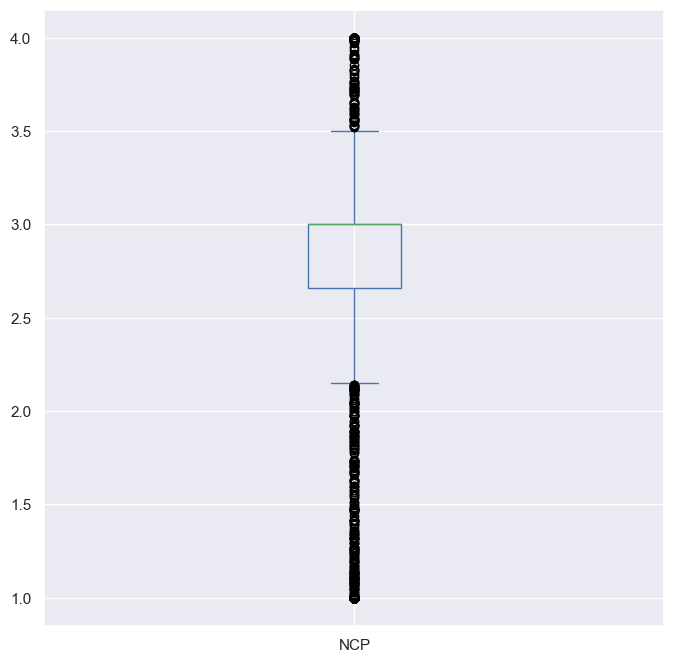

In [297]:
dados["NCP"].plot(kind='box')

<Axes: >

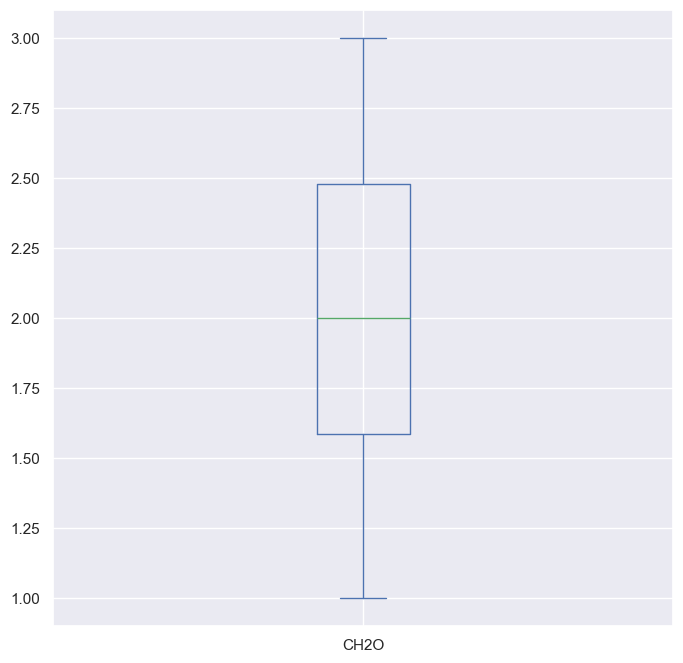

In [298]:
dados["CH2O"].plot(kind='box')

<Axes: >

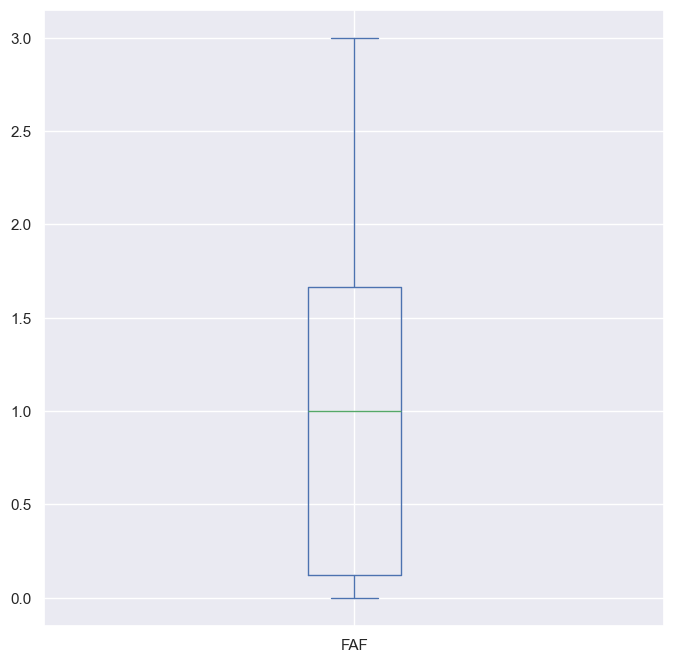

In [299]:
dados["FAF"].plot(kind='box')

<Axes: >

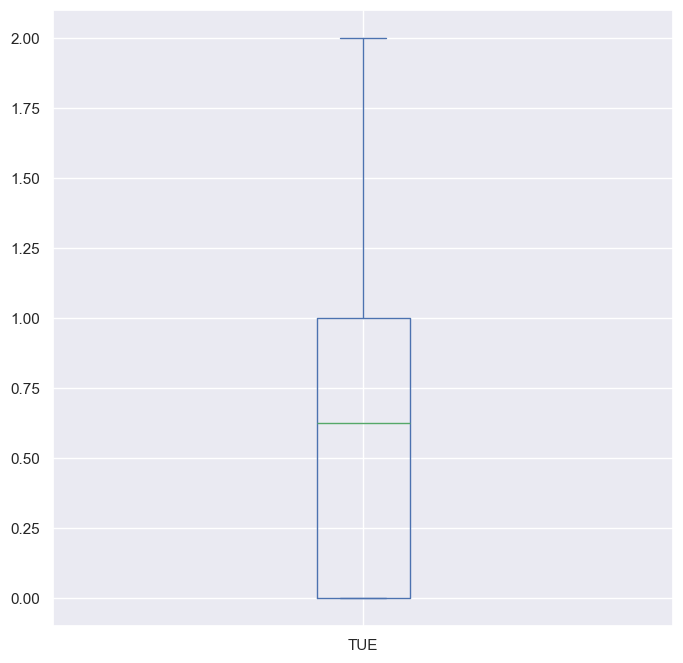

In [300]:
dados["TUE"].plot(kind='box')

Pelo boxplot temos Age, Height, Weight e NCP com Outliers  | index [0, 1, 2, 4]

### Analise de dados

In [301]:
dados.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [302]:
dados.var(numeric_only=True)

Age        40.271313
Height      0.008706
Weight    685.977477
FCVC        0.285078
NCP         0.605344
CH2O        0.375712
FAF         0.723507
TUE         0.370792
dtype: float64

<Axes: >

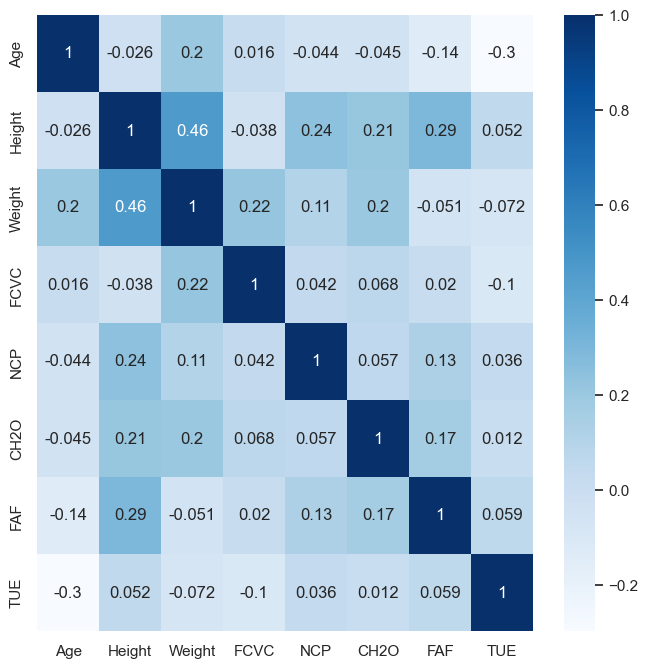

In [303]:
correlacoes = dados.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(correlacoes, annot=True, cmap='Blues')

### Começando Pré Processamento

Os dados nao possuem valores faltantes!

#### Removendo valores Duplicados

In [304]:
dados = dados.drop_duplicates()
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Removendo Outliers

Outlier Age

In [305]:
dados.describe()
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

print(primeiro_quartil[0])
print(terceiro_quartil[0])

menor = primeiro_quartil[0] - (terceiro_quartil[0] - primeiro_quartil[0])*3
maior = terceiro_quartil[0] + (terceiro_quartil[0] - primeiro_quartil[0])*3

19.9159375
26.0


C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\3338049579.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[0])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\3338049579.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[0])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\3338049579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[0] - (terceiro_qua

In [306]:
dados[dados['Age'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [307]:
dados[dados['Age'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_I
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,Female,61.000000,1.650000,66.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Normal_Weight
161,Male,55.000000,1.650000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
169,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
232,Female,51.000000,1.590000,50.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,2.000000,0.0,no,Public_Transportation,Normal_Weight
252,Male,56.000000,1.790000,90.000000,yes,no,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
1013,Male,55.246250,1.769269,80.491339,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
1034,Male,50.832559,1.745528,82.130728,yes,yes,2.000000,3.000000,Sometimes,no,1.774778,no,0.943266,0.0,no,Automobile,Overweight_Level_II


In [308]:
dados = dados.drop(index=dados[dados['Age'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Outlier Height

In [309]:
print(primeiro_quartil[1])
print(terceiro_quartil[1])

menor = primeiro_quartil[1] - (terceiro_quartil[1] - primeiro_quartil[1])*3
maior = terceiro_quartil[1] + (terceiro_quartil[1] - primeiro_quartil[1])*3

1.6301785
1.7694915


C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\4290599729.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[1])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\4290599729.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[1])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\4290599729.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[1] - (terceiro_qua

In [310]:
dados[dados['Height'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [311]:
dados[dados['Height'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [312]:
dados = dados.drop(index=dados[dados['Height'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Outlier Weight

In [313]:
print(primeiro_quartil[2])
print(terceiro_quartil[2])

menor = primeiro_quartil[2] - (terceiro_quartil[2] - primeiro_quartil[2])*3
maior = terceiro_quartil[2] + (terceiro_quartil[2] - primeiro_quartil[2])*3

66.0

C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\1637127386.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[2])



108.015907


C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\1637127386.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[2])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\1637127386.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[2] - (terceiro_quartil[2] - primeiro_quartil[2])*3
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\1637127386.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

In [314]:
dados[dados['Weight'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [315]:
dados[dados['Weight'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [316]:
dados = dados.drop(index=dados[dados['Weight'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Outlier NCP

In [317]:
print(primeiro_quartil[4])
print(terceiro_quartil[4])

menor = primeiro_quartil[4] - (terceiro_quartil[4] - primeiro_quartil[4])*3
maior = terceiro_quartil[4] + (terceiro_quartil[4] - primeiro_quartil[4])*3

2.697467
3.0


C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\997807463.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[4])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\997807463.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[4])
C:\Users\vinic\AppData\Local\Temp\ipykernel_10388\997807463.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[4] - (terceiro_quarti

In [318]:
dados[dados['NCP'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
14,Male,23.000000,1.770000,60.000000,yes,yes,3.000000,1.000000,Sometimes,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
16,Male,27.000000,1.930000,102.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
17,Female,29.000000,1.530000,78.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
19,Female,23.000000,1.650000,70.000000,yes,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,Male,24.002404,1.609418,100.078367,yes,yes,2.885693,1.685134,Sometimes,no,1.011849,no,0.503105,1.217929,no,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II


In [319]:
dados[dados['NCP'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18,Female,30.000000,1.710000,82.000000,yes,yes,3.000000,4.000000,Frequently,yes,1.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
25,Male,20.000000,1.600000,50.000000,yes,no,2.000000,4.000000,Frequently,yes,2.000000,no,3.000000,2.000000,no,Public_Transportation,Normal_Weight
27,Female,23.000000,1.600000,52.000000,no,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Normal_Weight
30,Male,29.000000,1.770000,83.000000,no,yes,1.000000,4.000000,Frequently,no,3.000000,no,0.000000,1.000000,no,Motorbike,Overweight_Level_I
34,Male,22.000000,1.650000,62.000000,no,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Female,23.469538,1.507106,64.814109,yes,no,2.252472,3.986652,Sometimes,no,2.000000,no,0.934286,0.890626,no,Public_Transportation,Overweight_Level_II
1515,Male,37.186795,1.704877,107.947470,yes,yes,2.549782,3.985442,Sometimes,no,1.000000,no,1.976582,0.000000,no,Public_Transportation,Obesity_Type_II
1537,Male,30.870724,1.670774,101.626189,yes,yes,2.907744,3.990925,Sometimes,no,1.000000,no,1.999750,0.000000,no,Public_Transportation,Obesity_Type_II
1561,Male,31.194458,1.726279,110.714711,yes,yes,1.794825,3.914454,Sometimes,no,1.972016,no,0.668963,0.000000,no,Automobile,Obesity_Type_II


In [320]:
dados = dados.drop(index=dados[dados['NCP'] < menor].index)
dados = dados.drop(index=dados[dados['NCP'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,29.000000,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Transformando variáveis qualitativas para quantitativas

formatando algumas colunas

In [321]:
dados["Gender"] = dados["Gender"].map({"Female":0,"Male":1})
dados["family_history_with_overweight"] = dados["family_history_with_overweight"].map({"no":0,"yes":1})
dados["FAVC"] = dados["FAVC"].map({"no":0,"yes":1})
dados["CAEC"] = dados["CAEC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
dados["SMOKE"] = dados["SMOKE"].map({"no":0,"yes":1})
dados["SCC"] = dados["SCC"].map({"no":0,"yes":1})
dados["CALC"] = dados["CALC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
dados["MTRANS"] = dados["MTRANS"].map({"Walking":0,"Public_Transportation":1,"Automobile":2,"Motorbike":3,"Bike":4 })
dados["NObeyesdad"] = dados["NObeyesdad"].map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

In [322]:
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
5,1,29.000000,1.620000,53.000000,0,1,2.0,3.0,1,0,2.000000,0,0.000000,0.000000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,6


#### Verificando quais características influenciam mais nas 3 componentes principais através do PCA.

In [323]:
pca = decomposition.PCA(n_components=3)
pca.fit(dados)
dados_transform = pca.transform(dados)

In [324]:
componentes_principais = pca.components_.T
componentes_principais

array([[ 1.91266485e-03,  2.43758003e-03,  2.66586231e-01],
       [ 4.32672200e-02,  9.96206921e-01,  4.30825682e-02],
       [ 1.45763171e-03, -2.24845148e-03,  5.81498316e-02],
       [ 9.96608622e-01, -4.57714973e-02,  4.48717360e-02],
       [ 6.40597676e-03,  7.58607066e-03, -2.95288664e-02],
       [ 3.35282745e-03,  1.62077034e-03, -2.53976314e-02],
       [ 4.87765382e-03, -4.76891323e-03, -7.89020900e-02],
       [-1.07548950e-03, -7.48994945e-03,  1.60527076e-02],
       [-4.59804874e-03, -3.83712267e-03,  4.38895090e-02],
       [ 2.33583234e-04,  1.45959964e-03,  1.08414002e-02],
       [ 4.72066276e-03, -1.02755790e-02,  1.22748594e-01],
       [-1.72135386e-03, -3.00933948e-03,  1.64825551e-03],
       [-2.54800500e-03, -2.94300495e-02,  6.78427789e-01],
       [-2.52353123e-03, -2.69385621e-02,  6.44163181e-02],
       [ 4.27587527e-03, -2.76097956e-04, -3.73657465e-02],
       [-4.09028078e-04,  4.91053936e-02,  8.55524693e-02],
       [ 6.88363057e-02,  3.45253332e-02

##### Caracteristica [1Compontente, 2Componente, 3Componente]
###### Gender [ 1.91266485e-03,  2.43758003e-03,  2.66586036e-01]
###### Age [ 4.32672200e-02,  9.96206921e-01,  4.30825644e-02]
###### Height [ 1.45763171e-03, -2.24845148e-03,  5.81498194e-02]
###### Weight [ 9.96608622e-01, -4.57714973e-02,  4.48717429e-02]
###### family_history_with_overweight [ 6.40597676e-03,  7.58607066e-03, -2.95282600e-02]
###### FAVC [ 3.35282745e-03,  1.62077034e-03, -2.53985252e-02]
###### FCVC [ 4.87765382e-03, -4.76891323e-03, -7.89021661e-02]
###### NCP [-1.07548950e-03, -7.48994945e-03,  1.60525826e-02]
###### CAEC [-4.59804874e-03, -3.83712267e-03,  4.38893461e-02]
###### SMOKE [ 2.33583234e-04,  1.45959964e-03,  1.08414297e-02]
###### CH2O [ 4.72066276e-03, -1.02755790e-02,  1.22748512e-01]
###### SCC [-1.72135386e-03, -3.00933948e-03,  1.64826417e-03]
###### FAF [-2.54800500e-03, -2.94300495e-02,  6.78427769e-01]
###### TUE [-2.52353123e-03, -2.69385621e-02,  6.44163238e-02]
###### CALC [ 4.27587527e-03, -2.76097956e-04, -3.73656638e-02]
###### MTRANS [-4.09028078e-04,  4.91053936e-02,  8.55525120e-02]
###### NObeyesdad [ 6.88363057e-02,  3.45253332e-02, -6.50720994e-01]

In [325]:
componentes_principais_abs = abs(componentes_principais)

# Identificar as características mais influentes para cada componente
for i, componente in enumerate(componentes_principais_abs.T):
    print(f"Componente {i+1}:")
    indices_maiores = sorted(range(len(componente)), key=lambda x: componente[x], reverse=True)[:3]
    for indice in indices_maiores:
        print(f"  - Característica {indice+1}: {dados.columns[indice]}")
    print()

Componente 1:
  - Característica 4: Weight
  - Característica 17: NObeyesdad
  - Característica 2: Age

Componente 2:
  - Característica 2: Age
  - Característica 16: MTRANS
  - Característica 4: Weight

Componente 3:
  - Característica 13: FAF
  - Característica 17: NObeyesdad
  - Característica 1: Gender



Variabilidade de cada componente

In [326]:
pca.explained_variance_ratio_

array([0.95180716, 0.04375218, 0.0012678 ])

#### Escolhendo o método de seleção de característica K-Best e aplicando na base de dados

In [327]:
X = dados.drop(columns=['NObeyesdad'])
y = dados['NObeyesdad']
selector = SelectKBest(f_classif, k=3)
dados_new = selector.fit_transform(X, y)
dados_new

array([[  0.      ,  64.      ,   1.      ],
       [  0.      ,  56.      ,   1.      ],
       [  1.      ,  77.      ,   1.      ],
       ...,
       [  0.      , 133.689352,   1.      ],
       [  0.      , 133.346641,   1.      ],
       [  0.      , 133.472641,   1.      ]])

In [328]:
filter = selector.get_support()
selected_features = np.array(X.columns)[filter]
print("Selected features:", selected_features)

Selected features: ['Gender' 'Weight' 'family_history_with_overweight']


### Agrupamento ( K-Means e DaviesBouldin )

Parameter Grid com os dados Normais

In [329]:
cluster_methods=[
    ('KMeans',
      KMeans(),
      [
        {'n_clusters':[2,3,4,5,6,7,8],'n_init':[5,10,15,20]}
      ]
    ),
]

#nº de métodos de agrupamentos que serão aplicados (tamanho da lista)
n_cluster_methods = len(cluster_methods)

#atribuindo valores as variáveis dataset_name,X,y
dataset_name = 'ObesityDataSet_raw_and_data_sinthetic'

#for que vai percorrer a lista com os métodos de agrupamentos
#clf_name -> vai percorrer os nomes dos métodos
#clf -> os métodos de agrupamentos
#clf_params -> a lista de parâmetros
for clf_name, clf, clf_params in cluster_methods:

    #cria uma lista com cada item da lista de parâmetros
    par=list(ParameterGrid(clf_params))
    print(par)
    #variável best_estimator vai ser inicializada com o método de agrupamento com os parâmetros default
    best_estimator=clf
    #variável best_params sendo inicializada com o primeiro item da lista de parâmetros
    best_params=par[0]
    #variável best_score (valor do critério de validação) sendo inicializada com um valor baixo (próximo de zero)
    best_score= float('inf')
    #percorrendo a lista de parâmetros
    for i in par:

      #substituindo os parâmetro e aplicando no método de agrupamento
      m=clf.set_params(**i)
      #y_pred recebendo os labels encontrados pelos métodos e os transformando para inteiros
      y_pred = m.fit_predict(X)
      #calculando o critério de validação (davies_bouldi)
      s =  metrics.davies_bouldin_score(X, y_pred)
      #comparando se o coeficiente de davies_bouldi é menor do valor do best_score
      if s<best_score:
          #caso seja menor a variável best_score é atualizada
          best_score=s
          #e best_params recebe os parâmetros que estão sendo testados
          best_params=i

      print(f"parametros:{i}   |   davies_bouldin: {s}")

    #instancia o método de agrupamento com os melhores parâmetros
    clf=clf.set_params(**best_params)
    #aplica e retorna os labels encontrados
    y_pred = clf.fit_predict(X)
    #verifica quantos clusters foram gerados
    n_cluster = len(set(y_pred))

print(f"\nOs parâmetros ótimos encontrados: {best_params}")
print(f"O melhor valor do critério de validação: {best_score}\n\n")


[{'n_clusters': 2, 'n_init': 5}, {'n_clusters': 2, 'n_init': 10}, {'n_clusters': 2, 'n_init': 15}, {'n_clusters': 2, 'n_init': 20}, {'n_clusters': 3, 'n_init': 5}, {'n_clusters': 3, 'n_init': 10}, {'n_clusters': 3, 'n_init': 15}, {'n_clusters': 3, 'n_init': 20}, {'n_clusters': 4, 'n_init': 5}, {'n_clusters': 4, 'n_init': 10}, {'n_clusters': 4, 'n_init': 15}, {'n_clusters': 4, 'n_init': 20}, {'n_clusters': 5, 'n_init': 5}, {'n_clusters': 5, 'n_init': 10}, {'n_clusters': 5, 'n_init': 15}, {'n_clusters': 5, 'n_init': 20}, {'n_clusters': 6, 'n_init': 5}, {'n_clusters': 6, 'n_init': 10}, {'n_clusters': 6, 'n_init': 15}, {'n_clusters': 6, 'n_init': 20}, {'n_clusters': 7, 'n_init': 5}, {'n_clusters': 7, 'n_init': 10}, {'n_clusters': 7, 'n_init': 15}, {'n_clusters': 7, 'n_init': 20}, {'n_clusters': 8, 'n_init': 5}, {'n_clusters': 8, 'n_init': 10}, {'n_clusters': 8, 'n_init': 15}, {'n_clusters': 8, 'n_init': 20}]
parametros:{'n_clusters': 2, 'n_init': 5}   |   davies_bouldin: 0.5710340360481823

Aplicando o PCA para visualizar os resultados encontrados pelo método de agrupamento no Banco de dados normal

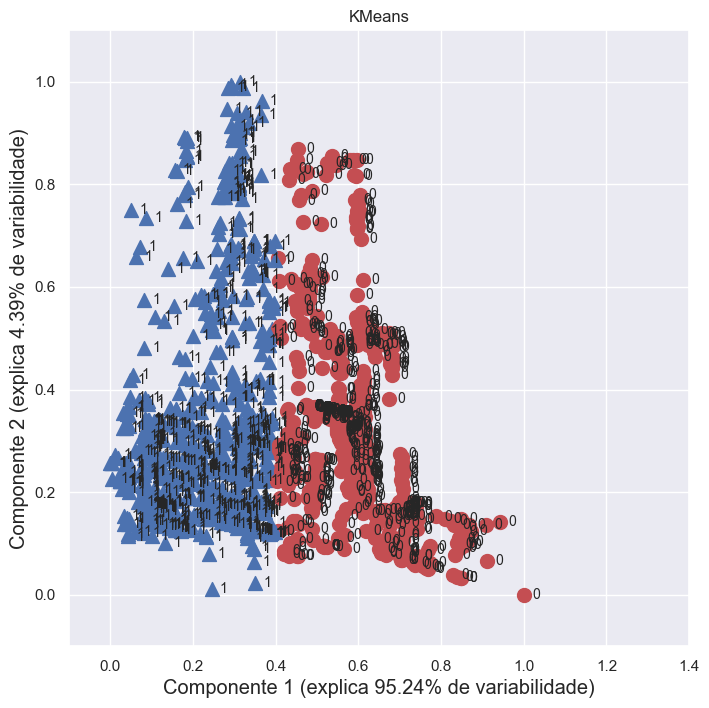

In [330]:
#define lista de cores de acordo com os labels encontrados
col=['r', 'b', 'g', 'm', 'y', 'c', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan']
clabel=[int(x) for x in y_pred]
for i in range(len(clabel)):
    k=clabel[i]
    if k == -1:
        clabel[i]='k'
    else:
        clabel[i]=col[k]

#define marcadores de acordo com os labrls encontrados
mar=['o', '^', '*', 'x', '+', 's', 'D', 'v', '>', '<', 'p', 'h']
mlabel=[int(x) for x in y_pred]
for i in range(len(mlabel)):
    l=mlabel[i]
    if l == -1:
        mlabel[i]='H'
    else:
        mlabel[i]=mar[l]

#aplica o PCA
pca = decomposition.PCA(n_components=2)

#a variável cluster_reduced_data recebe os dados reduzidos após a aplicação do PCA
cluster_reduced_data = pca.fit_transform(X)

fig = plt.figure()
x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]
x1=(x1-x1.min()) /  (x1.max()-x1.min())
y1=(y1-y1.min()) /  (y1.max()-y1.min())

for i in range(len(x1)):
    plt.scatter(x1[i], y1[i], marker=mlabel[i], s=100, c=clabel[i])
    plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y_pred[i], ha='left',va='center',fontsize=10)

plt.xlim(-0.1, +1.4), plt.ylim(-0.1, +1.1)
plt.xlabel('Componente 1 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
plt.ylabel('Componente 2 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
plt.title('KMeans')
plt.savefig('KMeans'+'.png',bbox_inches=0)

Parameter Grid com os dados Selecionados pelo K-Means

In [331]:
cluster_methods=[
    ('KMeans',
      KMeans(),
      [
        {'n_clusters':[2,3,4,5,6,7,8],'n_init':[5,10,15,20]}
      ]
    ),
]

#nº de métodos de agrupamentos que serão aplicados (tamanho da lista)
n_cluster_methods = len(cluster_methods)

#atribuindo valores as variáveis dataset_name,X,y
dataset_name = 'ObesityDataSet_raw_and_data_sinthetic'

#for que vai percorrer a lista com os métodos de agrupamentos
#clf_name -> vai percorrer os nomes dos métodos
#clf -> os métodos de agrupamentos
#clf_params -> a lista de parâmetros
for clf_name, clf, clf_params in cluster_methods:

    #cria uma lista com cada item da lista de parâmetros
    par=list(ParameterGrid(clf_params))
    print(par)
    #variável best_estimator vai ser inicializada com o método de agrupamento com os parâmetros default
    best_estimator=clf
    #variável best_params sendo inicializada com o primeiro item da lista de parâmetros
    best_params=par[0]
    #variável best_score (valor do critério de validação) sendo inicializada com um valor baixo (próximo de zero)
    best_score= float('inf')
    #percorrendo a lista de parâmetros
    for i in par:

      #substituindo os parâmetro e aplicando no método de agrupamento
      m=clf.set_params(**i)
      #y_pred recebendo os labels encontrados pelos métodos e os transformando para inteiros
      y_pred_select = m.fit_predict(dados_new)
      #calculando o critério de validação (davies_bouldin)
      s =  metrics.davies_bouldin_score(dados_new, y_pred_select)
      #comparando se o coeficiente de davies_bouldin encontrado é menor do valor do best_score
      if s<best_score:
          #caso seja menor a variável best_score é atualizada
          best_score=s
          #e best_params recebe os parâmetros que estão sendo testados
          best_params=i

      print(i,s)

    #instancia o método de agrupamento com os melhores parâmetros
    clf=clf.set_params(**best_params)
    #aplica e retorna os labels encontrados
    y_pred_select = clf.fit_predict(X)
    #verifica quantos clusters foram gerados
    n_cluster = len(set(y_pred_select))

print(f"\nOs parâmetros ótimos encontrados: {best_params}")
print(f"O melhor valor do critério de validação: {best_score}\n\n")

[{'n_clusters': 2, 'n_init': 5}, {'n_clusters': 2, 'n_init': 10}, {'n_clusters': 2, 'n_init': 15}, {'n_clusters': 2, 'n_init': 20}, {'n_clusters': 3, 'n_init': 5}, {'n_clusters': 3, 'n_init': 10}, {'n_clusters': 3, 'n_init': 15}, {'n_clusters': 3, 'n_init': 20}, {'n_clusters': 4, 'n_init': 5}, {'n_clusters': 4, 'n_init': 10}, {'n_clusters': 4, 'n_init': 15}, {'n_clusters': 4, 'n_init': 20}, {'n_clusters': 5, 'n_init': 5}, {'n_clusters': 5, 'n_init': 10}, {'n_clusters': 5, 'n_init': 15}, {'n_clusters': 5, 'n_init': 20}, {'n_clusters': 6, 'n_init': 5}, {'n_clusters': 6, 'n_init': 10}, {'n_clusters': 6, 'n_init': 15}, {'n_clusters': 6, 'n_init': 20}, {'n_clusters': 7, 'n_init': 5}, {'n_clusters': 7, 'n_init': 10}, {'n_clusters': 7, 'n_init': 15}, {'n_clusters': 7, 'n_init': 20}, {'n_clusters': 8, 'n_init': 5}, {'n_clusters': 8, 'n_init': 10}, {'n_clusters': 8, 'n_init': 15}, {'n_clusters': 8, 'n_init': 20}]
{'n_clusters': 2, 'n_init': 5} 0.5032469473095876
{'n_clusters': 2, 'n_init': 10} 

Aplicando o PCA para visualizar os resultados encontrados pelo método de agrupamento no Banco de dados Selecionado

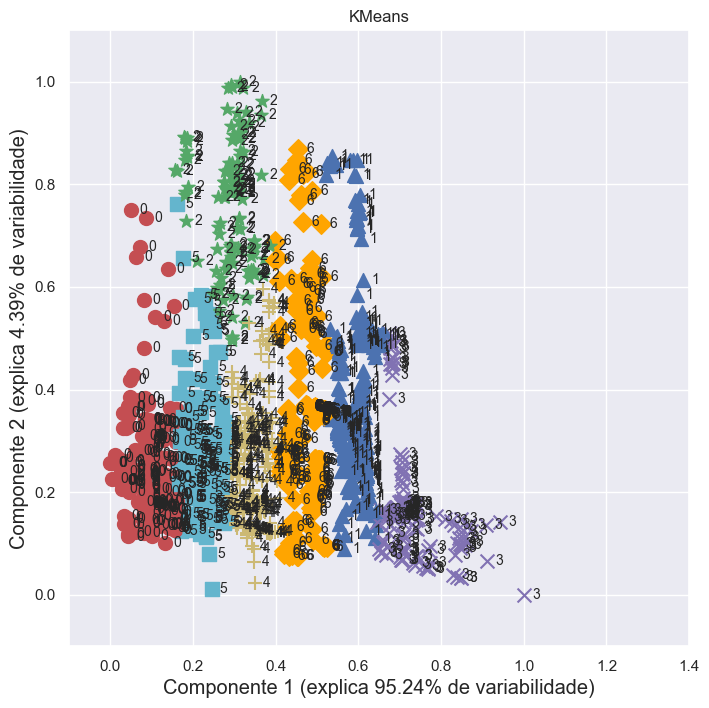

In [332]:
#define lista de cores de acordo com os labels encontrados
col=['r', 'b', 'g', 'm', 'y', 'c', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan']
clabel=[int(x) for x in y_pred_select]
for i in range(len(clabel)):
    k=clabel[i]
    if k == -1:
        clabel[i]='k'
    else:
        clabel[i]=col[k]

#define marcadores de acordo com os labrls encontrados
mar=['o', '^', '*', 'x', '+', 's', 'D', 'v', '>', '<', 'p', 'h']
mlabel=[int(x) for x in y_pred_select]
for i in range(len(mlabel)):
    l=mlabel[i]
    if l == -1:
        mlabel[i]='H'
    else:
        mlabel[i]=mar[l]

#aplica o PCA
pca = decomposition.PCA(n_components=2)

#a variável cluster_reduced_data recebe os dados reduzidos após a aplicação do PCA
cluster_reduced_data = pca.fit_transform(X)

fig = plt.figure()
x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]
x1=(x1-x1.min()) /  (x1.max()-x1.min())
y1=(y1-y1.min()) /  (y1.max()-y1.min())

for i in range(len(x1)):
    plt.scatter(x1[i], y1[i], marker=mlabel[i], s=100, c=clabel[i])
    plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y_pred_select[i], ha='left',va='center',fontsize=10)

plt.xlim(-0.1, +1.4), plt.ylim(-0.1, +1.1)
plt.xlabel('Componente 1 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
plt.ylabel('Componente 2 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
plt.title('KMeans')
plt.savefig('KMeans'+'.png',bbox_inches=0)